In [1]:
! pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=ff37cd56a4ce8c9e73f91a5449033edf5e22f988536b1858a45eb2221d424744
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("BDA Project") \
    .getOrCreate()

In [3]:
data_spark = spark.read.csv("cell2celltrain.csv", header=True, inferSchema=True )


In [4]:
data_spark.show(5)

+----------+-----+--------------+--------------+--------------------+---------------------+--------------+------------+-----------------+------------------+------------+------------+---------------+-----------------+-------------+-------------+-------------+------------+--------------+-----------------+-------------------+-------------------+----------------+---------------+----------+----------+-----------+--------+-------------+--------------------+------+------+------------+------------------+-----------------+----------+-------+-------------+----------------+--------------------+--------------+-----------+------------+-------------+--------------+-----------------------+----------------+-------------------+-------------------------+-----------+--------------+-------------------------+------------+-----------------------+------------+---------+------------+-------------+
|CustomerID|Churn|MonthlyRevenue|MonthlyMinutes|TotalRecurringCharge|DirectorAssistedCalls|OverageMinutes|Roaming

In [5]:
data_spark.printSchema()

root
 |-- CustomerID: integer (nullable = true)
 |-- Churn: string (nullable = true)
 |-- MonthlyRevenue: string (nullable = true)
 |-- MonthlyMinutes: string (nullable = true)
 |-- TotalRecurringCharge: string (nullable = true)
 |-- DirectorAssistedCalls: string (nullable = true)
 |-- OverageMinutes: string (nullable = true)
 |-- RoamingCalls: string (nullable = true)
 |-- PercChangeMinutes: string (nullable = true)
 |-- PercChangeRevenues: string (nullable = true)
 |-- DroppedCalls: double (nullable = true)
 |-- BlockedCalls: double (nullable = true)
 |-- UnansweredCalls: double (nullable = true)
 |-- CustomerCareCalls: double (nullable = true)
 |-- ThreewayCalls: double (nullable = true)
 |-- ReceivedCalls: double (nullable = true)
 |-- OutboundCalls: double (nullable = true)
 |-- InboundCalls: double (nullable = true)
 |-- PeakCallsInOut: double (nullable = true)
 |-- OffPeakCallsInOut: double (nullable = true)
 |-- DroppedBlockedCalls: double (nullable = true)
 |-- CallForwardingC

In [6]:
data_spark.describe().show()

+-------+------------------+-----+-----------------+-----------------+--------------------+---------------------+-----------------+------------------+-------------------+-------------------+-----------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-------------------+--------------------+------------------+------------------+------------------+------------------+-----------+------------------+------------------+--------------------+------------------+------------------+------------+------------------+-----------------+----------+-------+-------------+----------------+--------------------+--------------+-----------+------------+-------------+-------------------+-----------------------+----------------+-------------------+-------------------------+-----------------+--------------+-------------------------+-----------------+-----------------------+------------+

In [7]:
churn_distribution = data_spark.groupBy("Churn").count()


In [8]:
churn_distribution.show()

+-----+-----+
|Churn|count|
+-----+-----+
|   No|36336|
|  Yes|14711|
+-----+-----+



In [9]:
data_pd = data_spark.toPandas()

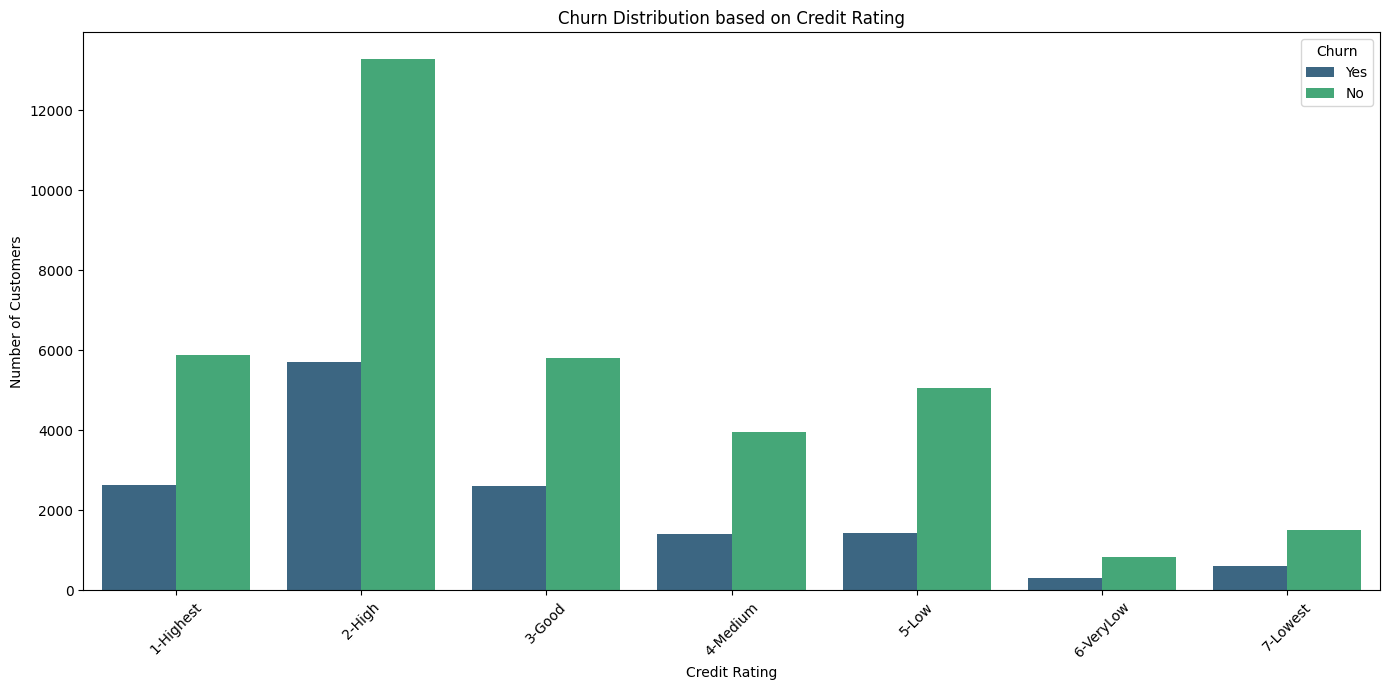

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.countplot(data=data_pd, x='CreditRating', hue='Churn', palette="viridis", order=sorted(data_pd['CreditRating'].unique()))
plt.title('Churn Distribution based on Credit Rating')
plt.xlabel('Credit Rating')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


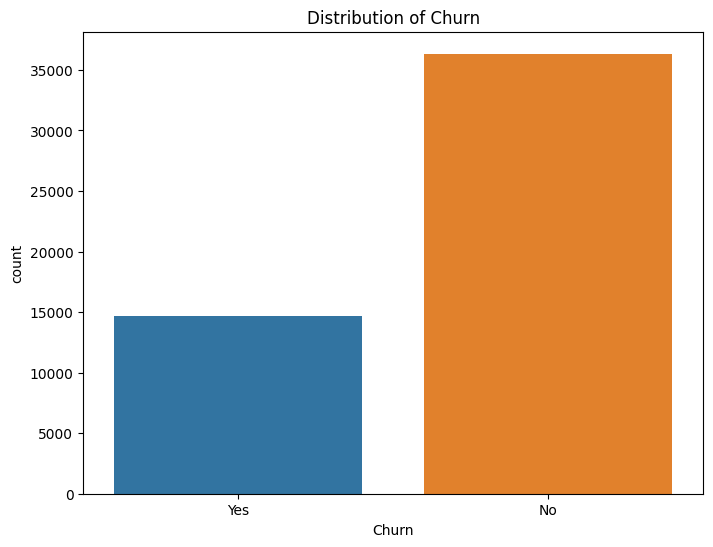

In [11]:
plt.figure(figsize=(8, 6))
sns.countplot(x="Churn", data=data_pd)
plt.title("Distribution of Churn")
plt.show()

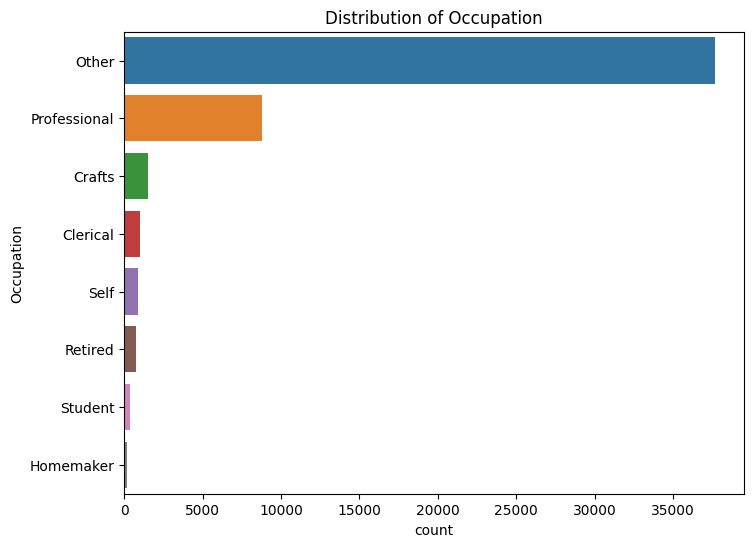

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(y="Occupation", data=data_pd, order=data_pd["Occupation"].value_counts().index)
plt.title("Distribution of Occupation")
plt.show()

# **Exploratory Data Analysis**

### **1. Customer Retention Efforts**

In [13]:
missing_values = data_pd[['Churn', 'MadeCallToRetentionTeam']].isnull().sum()

In [14]:
unique_churn_values = data_pd['Churn'].unique()
unique_call_values = data_pd['MadeCallToRetentionTeam'].unique()

In [15]:
missing_values, unique_churn_values, unique_call_values

(Churn                      0
 MadeCallToRetentionTeam    0
 dtype: int64,
 array(['Yes', 'No'], dtype=object),
 array(['Yes', 'No'], dtype=object))

In [16]:
churn_rates = data_pd.groupby('MadeCallToRetentionTeam')['Churn'].value_counts(normalize=True).unstack()

In [17]:
churn_rates_percentage = churn_rates * 100

churn_rates_percentage

Churn,No,Yes
MadeCallToRetentionTeam,,
No,71.75571,28.24429
Yes,54.95702,45.04298


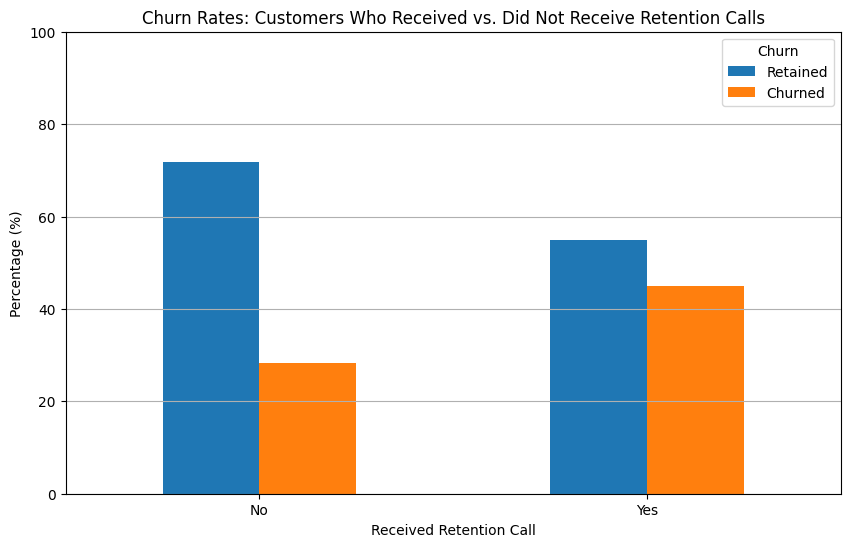

In [18]:
import matplotlib.pyplot as plt

# Visualization of the churn rates
churn_rates_percentage.plot(kind='bar', figsize=(10, 6))

plt.title('Churn Rates: Customers Who Received vs. Did Not Receive Retention Calls')
plt.xlabel('Received Retention Call')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', labels=['Retained', 'Churned'])
plt.ylim(0, 100)
plt.grid(axis='y')

plt.show()

### **2. Demographic Insights**

In [19]:
unique_prizm_values = data_pd['PrizmCode'].unique()
unique_income_values = data_pd['IncomeGroup'].unique()
unique_marital_status_values = data_pd['MaritalStatus'].unique()

unique_prizm_values, unique_income_values, unique_marital_status_values

(array(['Suburban', 'Town', 'Other', 'Rural'], dtype=object),
 array([4, 5, 6, 9, 1, 7, 3, 0, 8, 2], dtype=int32),
 array(['No', 'Yes', 'Unknown'], dtype=object))

In [20]:
# Datatype changed from string to float

import pandas as pd

data_pd['PrizmCode'] = pd.factorize(data_pd['PrizmCode'])[0].astype(float)

data_pd['MonthlyRevenue'] = pd.factorize(data_pd['MonthlyRevenue'])[0].astype(float)

data_pd['MonthlyMinutes'] = pd.factorize(data_pd['MonthlyMinutes'])[0].astype(float)

In [21]:
data_pd['PrizmCode'].unique()

array([0., 1., 2., 3.])

In [22]:
prizm_aggregation = data_pd.groupby('PrizmCode').agg({
    'MonthlyRevenue': 'mean',
    'MonthlyMinutes': 'mean',
    'Churn': lambda x: (x == 'Yes').mean() * 100
}).reset_index()


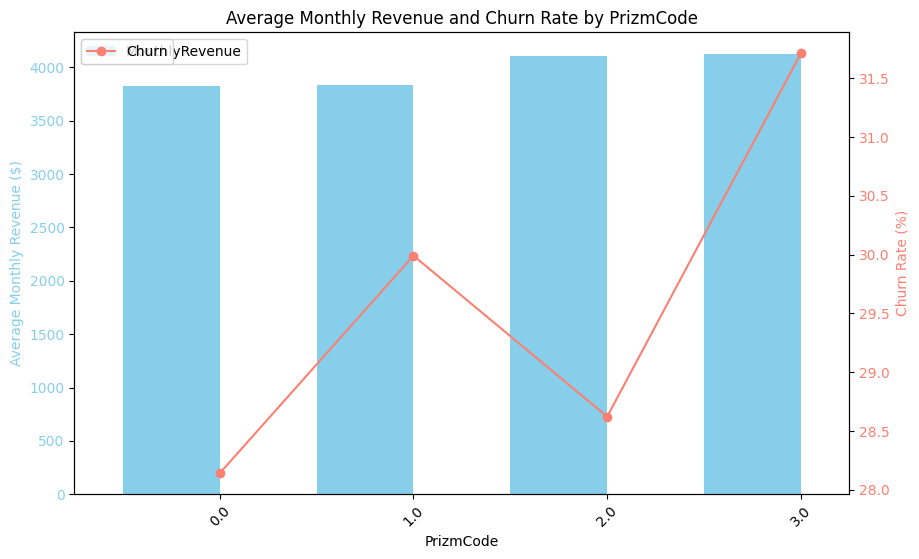

In [23]:
# Visualizing the average monthly revenue and churn rate for each PrizmCode category
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for average monthly revenue
ax1.set_title('Average Monthly Revenue and Churn Rate by PrizmCode')
ax1 = prizm_aggregation.plot(kind='bar', x='PrizmCode', y='MonthlyRevenue', ax=ax1, color='skyblue', position=1)
ax1.set_ylabel('Average Monthly Revenue ($)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
plt.xticks(rotation=45)

# Twin axis for churn rate
ax2 = ax1.twinx()
ax2 = prizm_aggregation.plot(kind='line', x='PrizmCode', y='Churn', ax=ax2, color='salmon', marker='o')
ax2.set_ylabel('Churn Rate (%)', color='salmon')
ax2.tick_params(axis='y', labelcolor='salmon')

plt.show()


### **3. Trend Analysis**

In [24]:
# Datatype changed from string to numeric

data_pd['PercChangeMinutes'] = pd.to_numeric(data_pd['PercChangeMinutes'], errors='coerce')
data_pd['PercChangeRevenues'] = pd.to_numeric(data_pd['PercChangeRevenues'], errors='coerce')

<ipython-input-25-42e2681c994a>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(churned_customers['PercChangeMinutes'], label='Churned', shade=True)
<ipython-input-25-42e2681c994a>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(retained_customers['PercChangeMinutes'], label='Retained', shade=True)
<ipython-input-25-42e2681c994a>:20: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(churned_customers['PercChangeRevenues'], label='Churned', shade=True)
<ipython-input-25-42e2681c994a>:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please

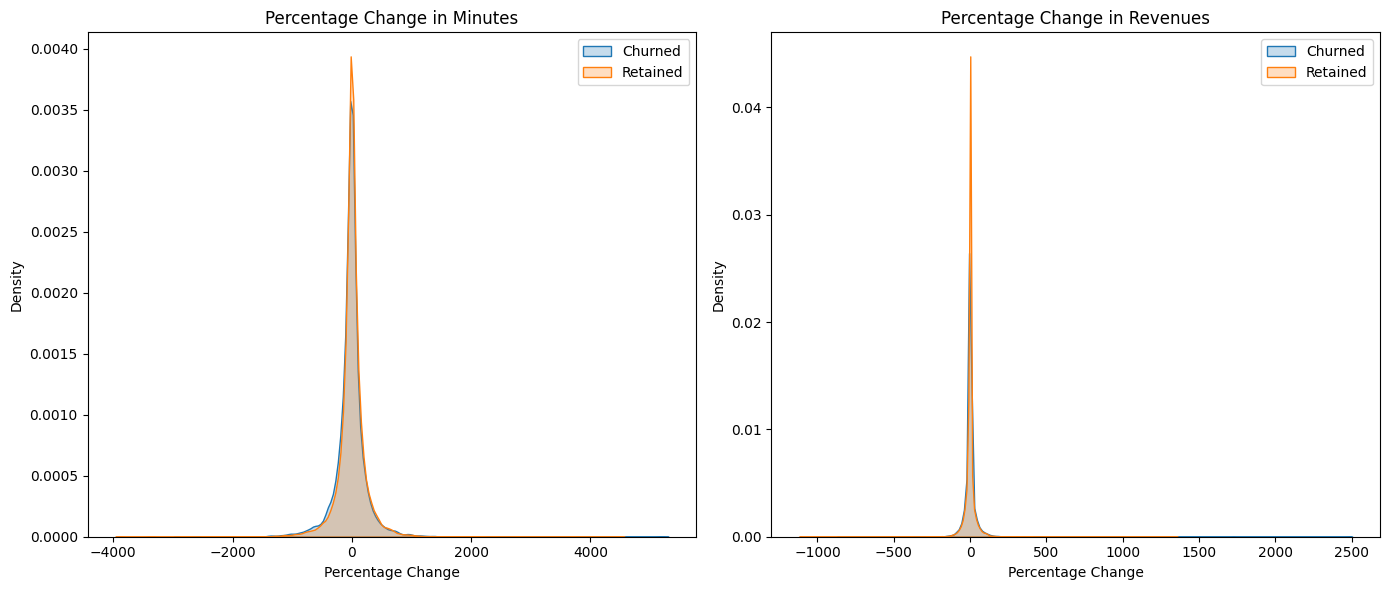

In [25]:
import seaborn as sns

# Segmenting the data by churn
churned_customers = data_pd[data_pd['Churn'] == 'Yes']
retained_customers = data_pd[data_pd['Churn'] == 'No']

plt.figure(figsize=(14, 6))

# Plotting PercChangeMinutes
plt.subplot(1, 2, 1)
sns.kdeplot(churned_customers['PercChangeMinutes'], label='Churned', shade=True)
sns.kdeplot(retained_customers['PercChangeMinutes'], label='Retained', shade=True)
plt.title('Percentage Change in Minutes')
plt.xlabel('Percentage Change')
plt.ylabel('Density')
plt.legend()

# Plotting PercChangeRevenues
plt.subplot(1, 2, 2)
sns.kdeplot(churned_customers['PercChangeRevenues'], label='Churned', shade=True)
sns.kdeplot(retained_customers['PercChangeRevenues'], label='Retained', shade=True)
plt.title('Percentage Change in Revenues')
plt.xlabel('Percentage Change')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


### **4. Occupation and Usage Patterns**

In [26]:
# Aggregating data by Occupation for average MonthlyMinutes and MonthlyRevenue
occupation_aggregation = data_pd.groupby('Occupation').agg({
    'MonthlyMinutes': 'mean',
    'MonthlyRevenue': 'mean'
}).reset_index()

# Sorting the data for better visualization
occupation_aggregation_sorted = occupation_aggregation.sort_values(by='MonthlyMinutes', ascending=False)


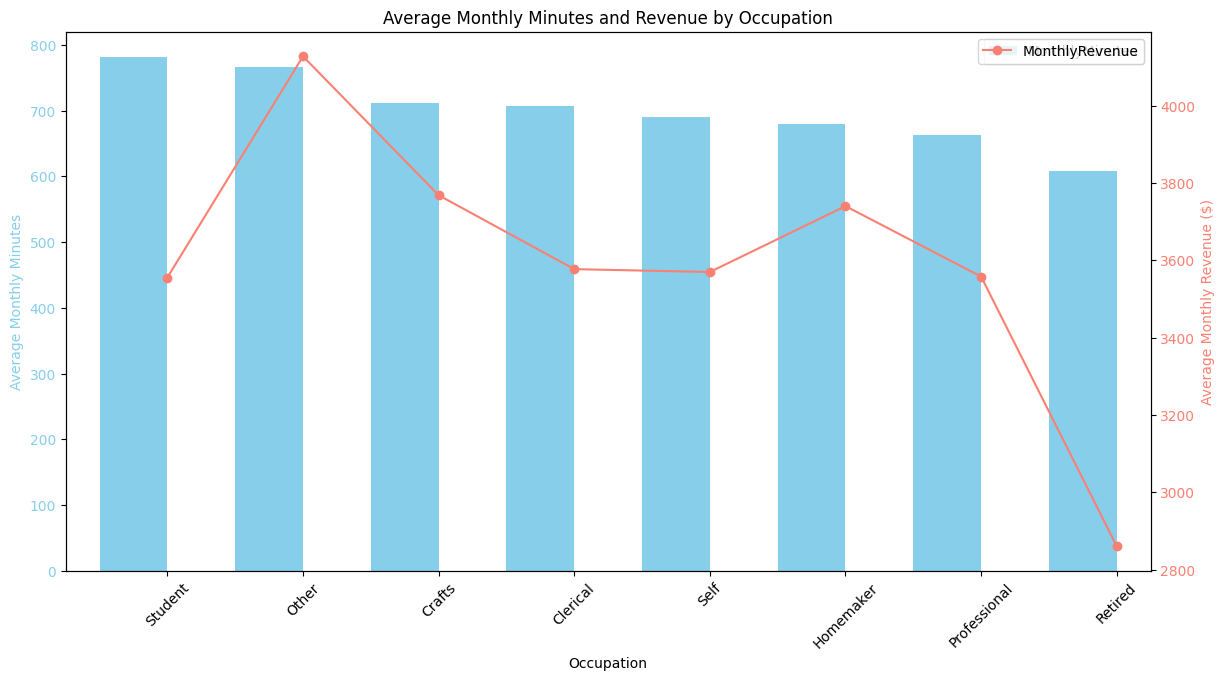

In [27]:
# Visualizing average monthly minutes and monthly revenue by occupation

fig, ax1 = plt.subplots(figsize=(14, 7))

occupation_aggregation_sorted.plot(kind='bar', x='Occupation', y='MonthlyMinutes', ax=ax1, color='skyblue', position=1)
ax1.set_title('Average Monthly Minutes and Revenue by Occupation')
ax1.set_ylabel('Average Monthly Minutes', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xlabel('Occupation')
plt.xticks(rotation=45)

# Twin axis for average monthly revenue
ax2 = ax1.twinx()
occupation_aggregation_sorted.plot(kind='line', x='Occupation', y='MonthlyRevenue', ax=ax2, color='salmon', marker='o')
ax2.set_ylabel('Average Monthly Revenue ($)', color='salmon')
ax2.tick_params(axis='y', labelcolor='salmon')

plt.show()


### **5. Roaming Analysis**

In [28]:
# Datatype changed from string to numeric

data_pd['RoamingCalls'] = pd.to_numeric(data_pd['RoamingCalls'], errors='coerce')

In [29]:
# Calculating basic statistics for Roaming Calls
roaming_stats_churned = data_pd[data_pd['Churn'] == 'Yes']['RoamingCalls'].describe()
roaming_stats_retained = data_pd[data_pd['Churn'] == 'No']['RoamingCalls'].describe()

print("Statistics for Churned Customers:\n", roaming_stats_churned)
print("\nStatistics for Retained Customers:\n", roaming_stats_retained)


Statistics for Churned Customers:
 count    14641.000000
mean         1.404358
std         11.106095
min          0.000000
25%          0.000000
50%          0.000000
75%          0.300000
max        850.900000
Name: RoamingCalls, dtype: float64

Statistics for Retained Customers:
 count    36250.000000
mean         1.168345
std          9.246760
min          0.000000
25%          0.000000
50%          0.000000
75%          0.300000
max       1112.400000
Name: RoamingCalls, dtype: float64


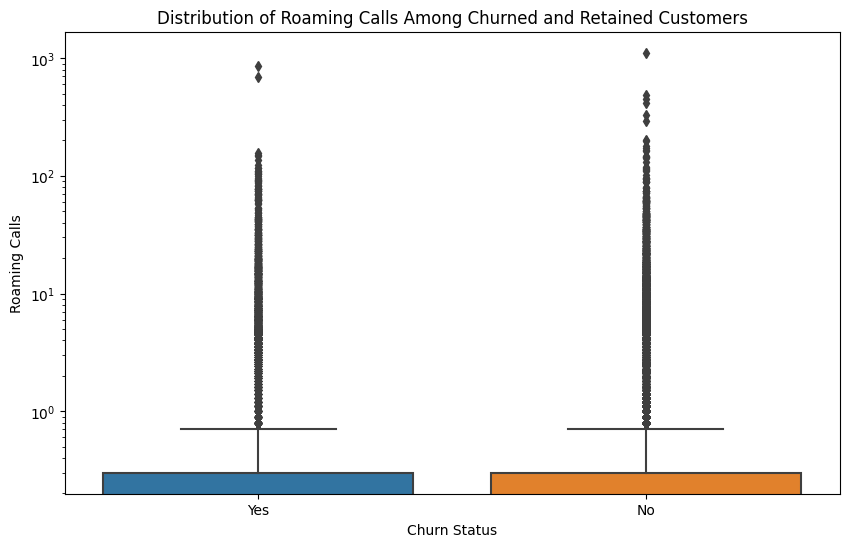

In [30]:
# Exploring the distribution of RoamingCalls and comparing between churned and retained customers

plt.figure(figsize=(10, 6))

sns.boxplot(x='Churn', y='RoamingCalls', data=data_pd)

plt.title('Distribution of Roaming Calls Among Churned and Retained Customers')
plt.xlabel('Churn Status')
plt.ylabel('Roaming Calls')
plt.yscale('log')  # Using logarithmic scale due to wide range of values

plt.show()

# **Predictions**

### **1. Predicting Customer Churn**

In [37]:
# Load the data
data = spark.read.csv('cell2celltrain.csv', header=True, inferSchema=True)
data.printSchema()

root
 |-- CustomerID: integer (nullable = true)
 |-- Churn: string (nullable = true)
 |-- MonthlyRevenue: string (nullable = true)
 |-- MonthlyMinutes: string (nullable = true)
 |-- TotalRecurringCharge: string (nullable = true)
 |-- DirectorAssistedCalls: string (nullable = true)
 |-- OverageMinutes: string (nullable = true)
 |-- RoamingCalls: string (nullable = true)
 |-- PercChangeMinutes: string (nullable = true)
 |-- PercChangeRevenues: string (nullable = true)
 |-- DroppedCalls: double (nullable = true)
 |-- BlockedCalls: double (nullable = true)
 |-- UnansweredCalls: double (nullable = true)
 |-- CustomerCareCalls: double (nullable = true)
 |-- ThreewayCalls: double (nullable = true)
 |-- ReceivedCalls: double (nullable = true)
 |-- OutboundCalls: double (nullable = true)
 |-- InboundCalls: double (nullable = true)
 |-- PeakCallsInOut: double (nullable = true)
 |-- OffPeakCallsInOut: double (nullable = true)
 |-- DroppedBlockedCalls: double (nullable = true)
 |-- CallForwardingC

In [38]:
from pyspark.sql.functions import col, when
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml import Pipeline

# Convert columns from string to float
float_columns = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls',
                 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
                 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2']
for col_name in float_columns:
    data = data.withColumn(col_name, col(col_name).cast('float'))

# Filter and convert the 'Churn' column to binary values
data = data.filter(col("Churn").isin("Yes", "No"))
data = data.withColumn("label", when(col("Churn") == "Yes", 1).otherwise(0))

# Dropped rows with null values in key columns
data = data.na.drop(subset=float_columns)

In [39]:
# Defined categorical and numerical features
categorical_features = ['ServiceArea', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable',
                        'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
                        'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
                        'NotNewCellphoneUser', 'OwnsMotorcycle', 'HandsetPrice', 'MadeCallToRetentionTeam',
                        'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus']
numerical_features = float_columns + ['DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
                                      'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
                                      'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
                                      'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs',
                                      'ActiveSubs', 'RetentionCalls', 'RetentionOffersAccepted',
                                      'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating']

# Handling categorical features
stages = [StringIndexer(inputCol=c, outputCol=c+"_index", handleInvalid="keep") for c in categorical_features]

# VectorAssembler to combine all feature columns into a single vector column
assembler_inputs = [c + "_index" for c in categorical_features] + numerical_features
stages += [VectorAssembler(inputCols=assembler_inputs, outputCol="features")]

In [40]:
# RandomForestClassifier model
stages += [RandomForestClassifier(featuresCol="features", labelCol="label", maxBins=750)]

# Creating the pipeline
pipeline = Pipeline(stages=stages)

# Splitting the data into training and testing sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=123)

# Fitting the pipeline to the training data
model = pipeline.fit(train_data)

# Making predictions on the test data
predictions = model.transform(test_data)

In [41]:
# Evaluating the model
evaluator = BinaryClassificationEvaluator()
accuracy = evaluator.evaluate(predictions)

print(f"Model accuracy: {accuracy}")

Model accuracy: 0.624765433175906


## **2. Monthly Revenue Forecasting**

In [42]:
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline

# Convert columns from string to float
float_columns = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls',
                 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
                 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2']
for col_name in float_columns:
    data = data.withColumn(col_name, col(col_name).cast('float'))

In [43]:
# Defined categorical and numerical features
categorical_features = ['ServiceArea', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable',
                        'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
                        'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
                        'NotNewCellphoneUser', 'OwnsMotorcycle', 'HandsetPrice', 'MadeCallToRetentionTeam',
                        'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus']
numerical_features = float_columns + ['DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
                                      'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
                                      'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
                                      'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs',
                                      'ActiveSubs', 'RetentionCalls', 'RetentionOffersAccepted',
                                      'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating']

# Handling categorical features with null handling
stages = [StringIndexer(inputCol=c, outputCol=c+"_index", handleInvalid="keep") for c in categorical_features]

# VectorAssembler to combine all feature columns into a single vector column with handleInvalid set to "skip"
assembler = VectorAssembler(inputCols=[c + "_index" for c in categorical_features] + numerical_features,
                            outputCol="features", handleInvalid="skip")
stages += [assembler]

In [44]:
# RandomForestRegressor model
rf = RandomForestRegressor(featuresCol="features", labelCol="MonthlyRevenue", numTrees=20, maxDepth=10, maxBins=740)

# Creating the pipeline
pipeline = Pipeline(stages=stages + [rf])

# Splitting the data into training and testing sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=123)

# Fitting the model to the training data
model = pipeline.fit(train_data)

# Making predictions on the test data
predictions = model.transform(test_data)

In [45]:
# Evaluating the model
evaluator = RegressionEvaluator(labelCol="MonthlyRevenue")
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 8.538129161352202


## **3. Overage Minutes Prediction:**

In [46]:
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler, StringIndexer
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline

# Convert columns from string to float
float_columns = ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls',
                 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
                 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2']
for col_name in float_columns:
    data = data.withColumn(col_name, col(col_name).cast('float'))

# Defined the OverageMinutes column for regression
data = data.withColumn("label", col("OverageMinutes").cast('float'))

# Dropped rows with null values in key columns
data = data.na.drop(subset=float_columns + ["OverageMinutes"])

In [47]:
# Defined categorical and numerical features
categorical_features = ['ServiceArea', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable',
                        'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers',
                        'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
                        'NotNewCellphoneUser', 'OwnsMotorcycle', 'HandsetPrice', 'MadeCallToRetentionTeam',
                        'CreditRating', 'PrizmCode', 'Occupation', 'MaritalStatus']
numerical_features = float_columns + ['DroppedCalls', 'BlockedCalls', 'UnansweredCalls', 'CustomerCareCalls',
                                      'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls',
                                      'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls',
                                      'CallForwardingCalls', 'CallWaitingCalls', 'MonthsInService', 'UniqueSubs',
                                      'ActiveSubs', 'RetentionCalls', 'RetentionOffersAccepted',
                                      'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating']

# Handling categorical features
stages = [StringIndexer(inputCol=c, outputCol=c+"_index", handleInvalid="keep") for c in categorical_features]

# VectorAssembler to combine all feature columns into a single vector column
assembler_inputs = [c + "_index" for c in categorical_features] + numerical_features
stages += [VectorAssembler(inputCols=assembler_inputs, outputCol="features")]

In [48]:
# RandomForestRegressor model
rf = RandomForestRegressor(featuresCol="features", labelCol="label",  maxBins=750)

# Creating the pipeline
pipeline = Pipeline(stages=stages + [rf])

# Splitting the data into training and testing sets
train_data, test_data = data.randomSplit([0.8, 0.2], seed=123)

# Fitting the model to the training data
model = pipeline.fit(train_data)

# Making predictions on the test data
predictions = model.transform(test_data)

In [49]:
# Evaluating the model
evaluator = RegressionEvaluator()
rmse = evaluator.evaluate(predictions, {evaluator.metricName: "rmse"})
print(f"Root Mean Squared Error (RMSE) on test data: {rmse}")

Root Mean Squared Error (RMSE) on test data: 52.58590590932617
